In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
master_df = pd.read_csv('C:/Users/Shoya/surf/data/master_df_v3.csv', encoding='latin1')

trends_df = pd.read_csv('C:/Users/Shoya/surf/data/Adj_Google_Trends_for_Mult_Keywords.csv', encoding='latin1') 
trends_cols = ["BitstampTrend", "CoinbaseTrend", "EthereumTrend", "BubbleTrend", "CryptocurrencyTrend", 
               "HashingTrend", "BlockchainTrend" ]

master_df[trends_cols] = trends_df[trends_cols]

master_df.head()

Unnamed: 0   Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0           0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1           1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2           2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3           3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4           4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price            Date(UTC)       ...         \
0        9854.490388      289.476771  2015-01-09 22:00:00       ...          
1       10733.474260      293.040042  2015-01-09 23:00:00       ...          
2          46.439149      293.890000  2015-01-10 00:00:00       ...          
3        8960.344674      289.175573  2015-01-10 01:00:00       ...          
4        2224.105007      289.062740  2015-01-10 02:00:00       ...          

  Moving Average Price % Change  MA % Change (Abs.Value)  Is Spike  \
0                           NaN                      NaN         0   
1                           NaN                      NaN         1   
2                           NaN                      NaN         1   
3                     -0.000034                 0.000034        -1   
4                     -0.004068                 0.004068         0   

  BitstampTrend  CoinbaseTrend  EthereumTrend  BubbleTrend  \
0          15.0           42.0           41.0         82.0   
1          16.0           48.0           39.0         86.0   
2          17.0           53.0           45.0         90.0   
3          19.0           59.0           69.0         90.0   
4          21.0           55.0           62.0         87.0   

   CryptocurrencyTrend  HashingTrend  BlockchainTrend  
0                 15.0          44.0             62.0  
1                 25.0          44.0             53.0  
2                 27.0          50.0             53.0  
3                 29.0          45.0             67.0  
4                 27.0          51.0             70.0  

[5 rows x 32 columns]

In [3]:
master_df.dropna(inplace=True)

master_df["Bitcoin Price"] = master_df["Close"]
master_df["Bitcoin Trend"] = master_df["Bitcoin (Adj.Overlap)"]

trends_cols.append("Bitcoin Trend")
trends_cols.append("Bitcoin Price")

for col in trends_cols:
    master_df[col].loc[master_df[col] == 0.000000] = 0.000001
    master_df[col + ' % Change'] = pd.Series(np.diff(np.log(master_df[col])))
    master_df[col + ' % Change'].loc[master_df[col + ' % Change'] == 0.000000] = 0.000001
    master_df[col + ' % Change (Abs)'] = abs(master_df[col + ' % Change'])




#master_df["Bitcoin (Adj.Overlap)"].loc[master_df["Bitcoin (Adj.Overlap)"] == 0.000000] = 0.000001

#master_df["Close"].loc[granger_df["Bitcoin (Adj.Overlap)"] == 0.000000] = 0.000001


#master_df["Bitcoin Trend % Change"] = pd.Series(np.diff(np.log(master_df["Bitcoin (Adj.Overlap)"])))
#master_df["Bitcoin Trend % Change"] = master_df["Bitcoin (Adj.Overlap)"].pct_change() 
#master_df["Bitcoin Trend % Change"].loc[master_df["Bitcoin Trend % Change"] == 0.000000] = 0.000001

#master_df["Bitcoin Trend % Change (Abs)"] = abs(master_df["Bitcoin Trend % Change"])


# master_df["Bitcoin Price % Change"] = pd.Series(np.diff(np.log(master_df["Close"])))
# #master_df["Bitcoin Price % Change"] = master_df["Close"].pct_change() 
# master_df["Bitcoin Price % Change"].loc[master_df["Bitcoin Price % Change"] == 0.000000] = 0.000001
# master_df["Bitcoin Price % Change (Abs)"] = abs(master_df["Bitcoin Price % Change"])

master_df.dropna(inplace=True)

master_df.head()

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Unnamed: 0   Timestamp    Open    High     Low   Close  Volume_(BTC)  \
3           3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4           4  1420855200  289.18  289.18  288.57  288.59      7.694195   
5           5  1420858800  286.66  286.98  286.65  286.70    501.942237   
6           6  1420862400  288.38  288.38  288.37  288.37      0.575908   
7           7  1420866000  290.25  290.66  290.25  290.27      2.315487   

   Volume_(Currency)  Weighted_Price            Date(UTC)  \
3        8960.344674      289.175573  2015-01-10 01:00:00   
4        2224.105007      289.062740  2015-01-10 02:00:00   
5      143886.762200      286.660001  2015-01-10 03:00:00   
6         166.078413      288.376527  2015-01-10 04:00:00   
7         672.622449      290.488546  2015-01-10 05:00:00   

               ...              CryptocurrencyTrend % Change  \
3              ...                                  0.759105   
4              ...                                 -0.482852   
5              ...                                 -0.148420   
6              ...                                  0.076961   
7              ...                                 -0.204794   

   CryptocurrencyTrend % Change (Abs)  HashingTrend % Change  \
3                            0.759105              -0.287682   
4                            0.482852              -0.080043   
5                            0.148420               0.405465   
6                            0.076961              -0.275412   
7                            0.204794               0.256720   

  HashingTrend % Change (Abs)  BlockchainTrend % Change  \
3                    0.287682                 -0.232332   
4                    0.080043                  0.074108   
5                    0.405465                 -0.205444   
6                    0.275412                 -0.236389   
7                    0.256720                  0.218689   

   BlockchainTrend % Change (Abs)  Bitcoin Trend % Change  \
3                        0.232332               -0.032790   
4                        0.074108               -0.051293   
5                        0.205444                0.034486   
6                        0.236389                0.000001   
7                        0.218689               -0.126294   

   Bitcoin Trend % Change (Abs)  Bitcoin Price % Change  \
3                      0.032790                0.006567   
4                      0.051293               -0.005701   
5                      0.034486               -0.006675   
6                      0.000001               -0.003144   
7                      0.126294               -0.022111   

   Bitcoin Price % Change (Abs)  
3                      0.006567  
4                      0.005701  
5                      0.006675  
6                      0.003144  
7                      0.022111  

[5 rows x 52 columns]

In [10]:
display(master_df.columns)

features = [
       'BitstampTrend % Change',
       'BitstampTrend % Change (Abs)', 'CoinbaseTrend % Change',
       'CoinbaseTrend % Change (Abs)', 'EthereumTrend % Change',
       'EthereumTrend % Change (Abs)', 'BubbleTrend % Change',
       'BubbleTrend % Change (Abs)', 'CryptocurrencyTrend % Change',
       'CryptocurrencyTrend % Change (Abs)', 'HashingTrend % Change',
       'HashingTrend % Change (Abs)', 'BlockchainTrend % Change',
       'BlockchainTrend % Change (Abs)', 'Bitcoin Trend % Change',
       'Bitcoin Trend % Change (Abs)', 'Bitcoin Price % Change',
       'Bitcoin Price % Change (Abs)']

pct_change_features = [ 
    'BitstampTrend % Change',
    'CoinbaseTrend % Change',
    'EthereumTrend % Change',
    'BubbleTrend % Change',
    'CryptocurrencyTrend % Change',
    'HashingTrend % Change',
    'BlockchainTrend % Change',
    'Bitcoin Trend % Change'
]

abs_pct_change_features = [ 
    'BitstampTrend % Change (Abs)',
    'CoinbaseTrend % Change (Abs)',
    'EthereumTrend % Change (Abs)',
    'BubbleTrend % Change (Abs)',
    'CryptocurrencyTrend % Change (Abs)',
    'HashingTrend % Change (Abs)',
    'BlockchainTrend % Change (Abs)',
    'Bitcoin Trend % Change (Abs)'
]

Index(['Unnamed: 0', 'Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Date(UTC)',
       'date', 'Bitcoin (Adj.Overlap)', 'isPartial', 'Date_UTC_trend',
       'Bitcoin (Unadj.)', 'Close Price % Change',
       'Close Price % Change (Abs)', 'Is Price Anomaly (Bitmap Detector)',
       'Is Price Anomaly (Derivative Detector)',
       'Is Price % Change Anomaly (Bitmap Detector)',
       'Is Trend Anomaly (Bitmap Detector)', 'Moving Average Price',
       'Moving Average Price % Change', 'MA % Change (Abs.Value)', 'Is Spike',
       'BitstampTrend', 'CoinbaseTrend', 'EthereumTrend', 'BubbleTrend',
       'CryptocurrencyTrend', 'HashingTrend', 'BlockchainTrend',
       'Bitcoin Price', 'Bitcoin Trend', 'BitstampTrend % Change',
       'BitstampTrend % Change (Abs)', 'CoinbaseTrend % Change',
       'CoinbaseTrend % Change (Abs)', 'EthereumTrend % Change',
       'EthereumTrend % Change (Abs)', 'BubbleTrend % Change',
       'Bubbl

In [19]:
# Test Granger Causality 

from statsmodels.tsa.api import SVAR 
from matplotlib import pyplot as plt

A = np.array([[ 1, 'E'],
              [ 0 , 1 ]])

B = np.array([['E',0], 
              [0, 'E']])

def svar_analysis(df, series1, series2, A, B, maxlag_num ):
    SVAR_model = SVAR(df[[series1, series2]], svar_type='AB', A=A, B=B)
    result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags= maxlag_num)
    display(result_SVAR.summary())
    
    SVAR_granger_result = result_SVAR.test_causality(caused=series1, causing=series2, kind='f')
    print(series2 + ' -> ' + series1)
    print(SVAR_granger_result.summary())
    
    SVAR_granger_result_2 = result_SVAR.test_causality(caused=series2, causing=series1, kind='f')
    print(series1 + ' -> ' + series2)
    print(SVAR_granger_result_2.summary())
    
    result_SVAR.plot();
    SVAR_irf = result_SVAR.irf(periods=maxlag_num)
    SVAR_irf.plot();
    SVAR_irf.plot_cum_effects();

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:02:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.4726
Nobs:                     30160.0    HQIC:                  -10.5624
Log likelihood:           74811.4    FPE:                2.47944e-05
AIC:                     -10.6049    Det(Omega_mle):     2.44045e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.059128         0.005780          -10.229           0.000
L1.BitstampTrend % Change           0.000044         0.000091            0.484    

BitstampTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: BitstampTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.7068         1.222       0.994  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BitstampTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BitstampTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.5638         1.222       1.000  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:02:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.2226
Nobs:                     30160.0    HQIC:                  -11.3125
Log likelihood:           86122.2    FPE:                1.17114e-05
AIC:                     -11.3549    Det(Omega_mle):     1.15273e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.058477         0.005780          -10.117           0.000
L1.CoinbaseTrend % Change          -0.000130         0.000132           -0.984    

CoinbaseTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: CoinbaseTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.171          1.222       0.098  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> CoinbaseTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause CoinbaseTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8912         1.222       0.797  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.8690
Nobs:                     30160.0    HQIC:                  -10.9589
Log likelihood:           80789.9    FPE:                1.66793e-05
AIC:                     -11.0013    Det(Omega_mle):     1.64170e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.059249         0.005780          -10.250           0.000
L1.EthereumTrend % Change          -0.000058         0.000110           -0.527    

EthereumTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: EthereumTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8986         1.222       0.779  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> EthereumTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause EthereumTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.7640         1.222       0.974  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.6024
Nobs:                     30160.0    HQIC:                  -11.6923
Log likelihood:           91849.3    FPE:                8.01078e-06
AIC:                     -11.7347    Det(Omega_mle):     7.88479e-06
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.058737         0.005780          -10.162           0.000
L1.BubbleTrend % Change            -0.000181         0.000159           -1.139    

BubbleTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: BubbleTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.191          1.222       0.076  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BubbleTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BubbleTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.9167         1.222       0.732  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.9626
Nobs:                     30160.0    HQIC:                  -11.0525
Log likelihood:           82201.6    FPE:                1.51887e-05
AIC:                     -11.0950    Det(Omega_mle):     1.49498e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                -0.058630         0.005780          -10.143           0.000
L1.CryptocurrencyTrend % Change          -0.000100         0.000

CryptocurrencyTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: CryptocurrencyTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.029          1.222       0.396  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> CryptocurrencyTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause CryptocurrencyTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8507         1.222       0.880  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.1435
Nobs:                     30160.0    HQIC:                  -11.2333
Log likelihood:           84928.4    FPE:                1.26762e-05
AIC:                     -11.2758    Det(Omega_mle):     1.24769e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.059287         0.005780          -10.257           0.000
L1.HashingTrend % Change           -0.000137         0.000127           -1.078    

HashingTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: HashingTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.9877         1.222       0.521  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> HashingTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause HashingTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.7963         1.222       0.951  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.3637
Nobs:                     30160.0    HQIC:                  -11.4536
Log likelihood:           88250.0    FPE:                1.01703e-05
AIC:                     -11.4960    Det(Omega_mle):     1.00103e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change            -0.058639         0.005780          -10.145           0.000
L1.BlockchainTrend % Change          -0.000182         0.000141           -1

BlockchainTrend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: BlockchainTrend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.256          1.222       0.031  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BlockchainTrend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BlockchainTrend % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.9489         1.222       0.640  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:03:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.5655
Nobs:                     30160.0    HQIC:                  -14.6554
Log likelihood:           136533.    FPE:                4.13818e-07
AIC:                     -14.6978    Det(Omega_mle):     4.07310e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change          -0.059882         0.005780          -10.360           0.000
L1.Bitcoin Trend % Change           0.000105         0.000700            0.150    

Bitcoin Trend % Change -> Bitcoin Price % Change
Granger causality F-test. H_0: Bitcoin Trend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.038          1.222       0.369  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> Bitcoin Trend % Change
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause Bitcoin Trend % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    2.042          1.222       0.000  (120, 59840)
--------------------------------------------------


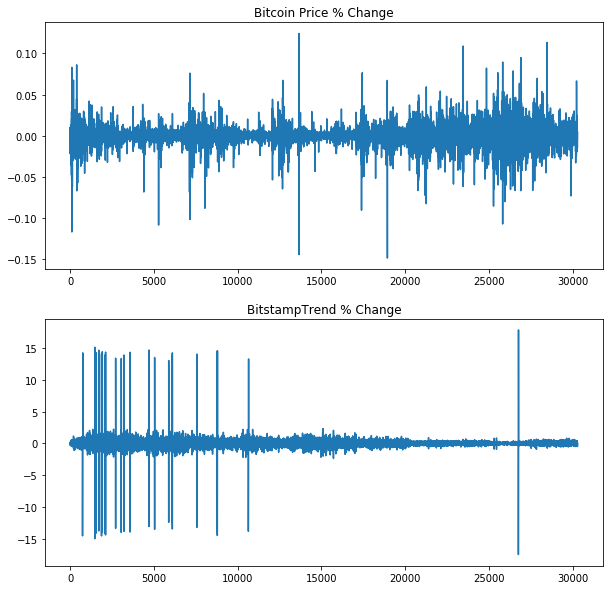

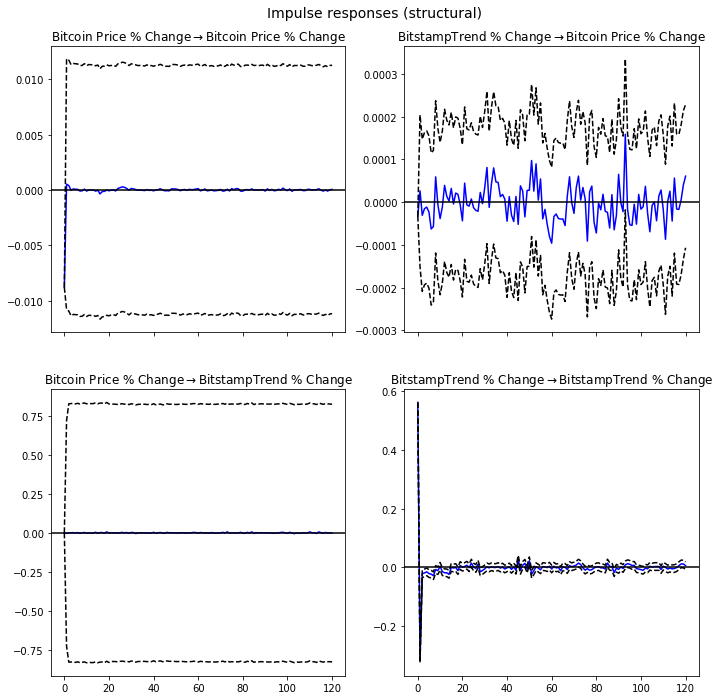

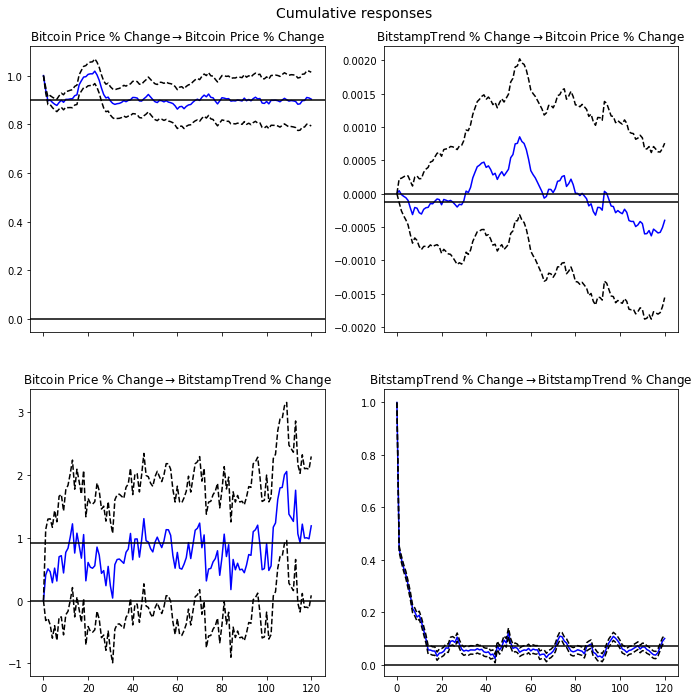

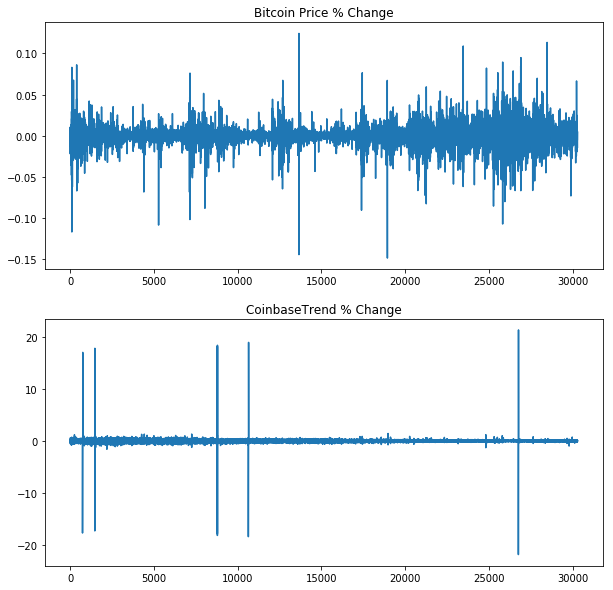

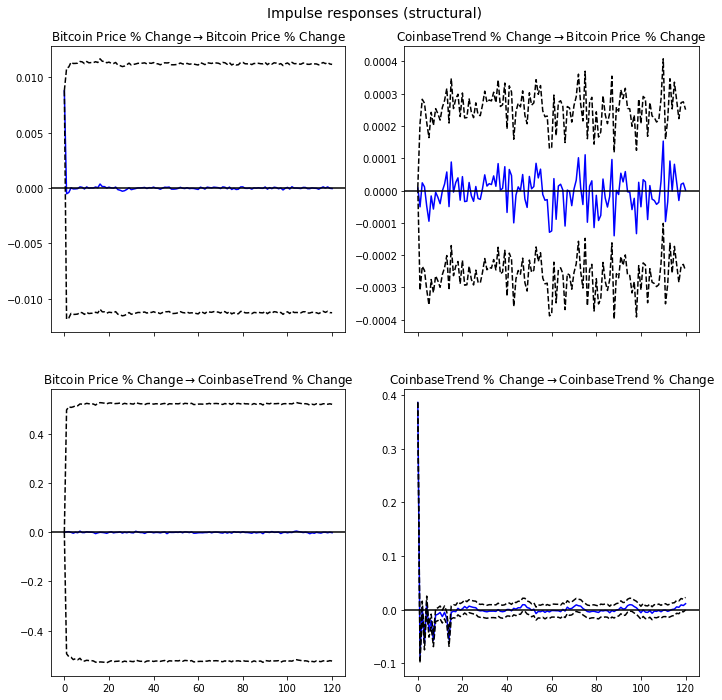

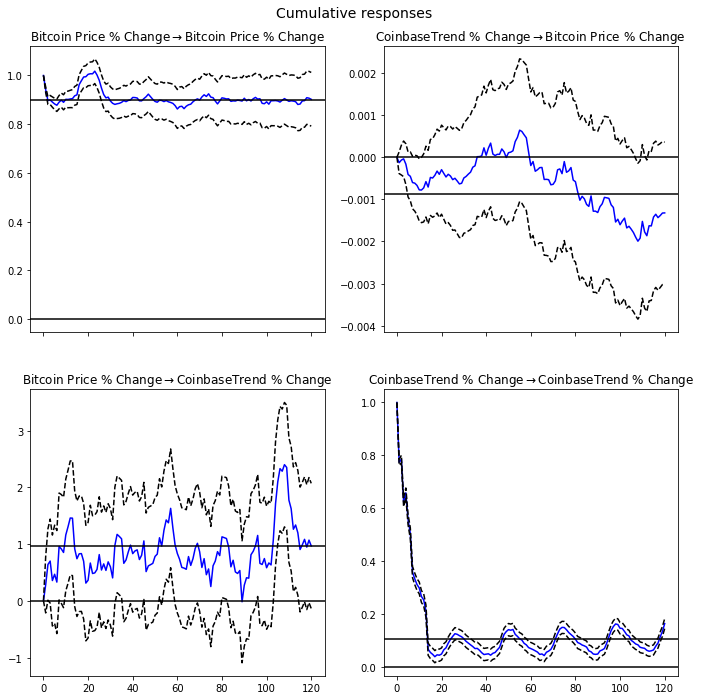

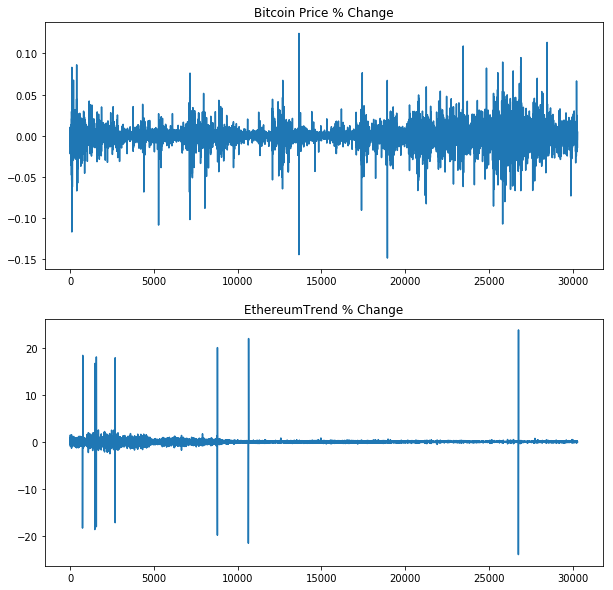

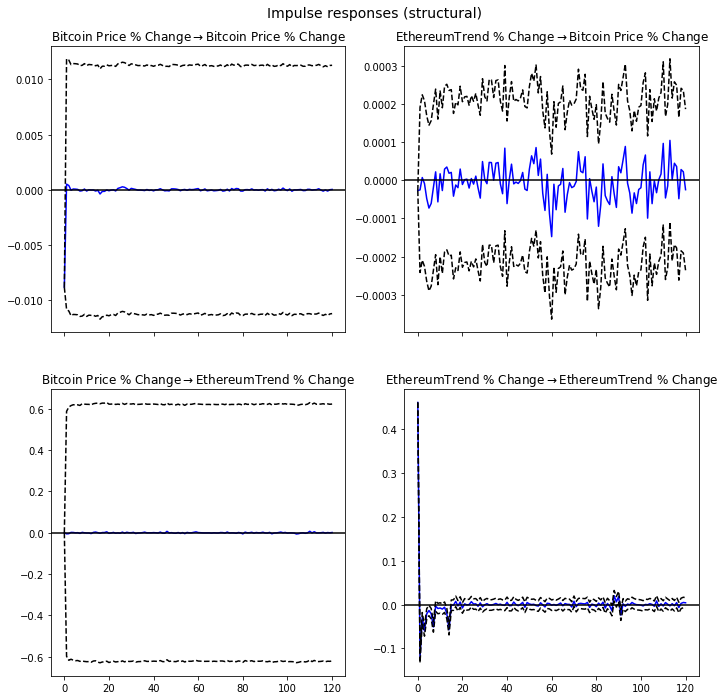

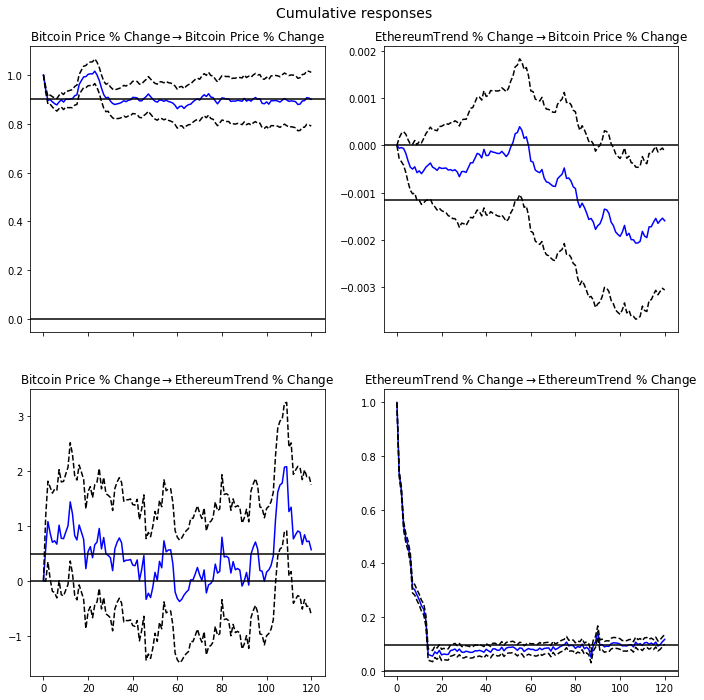

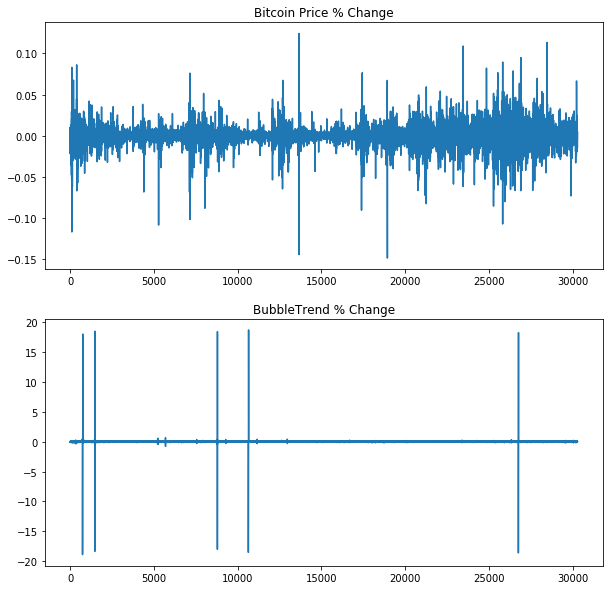

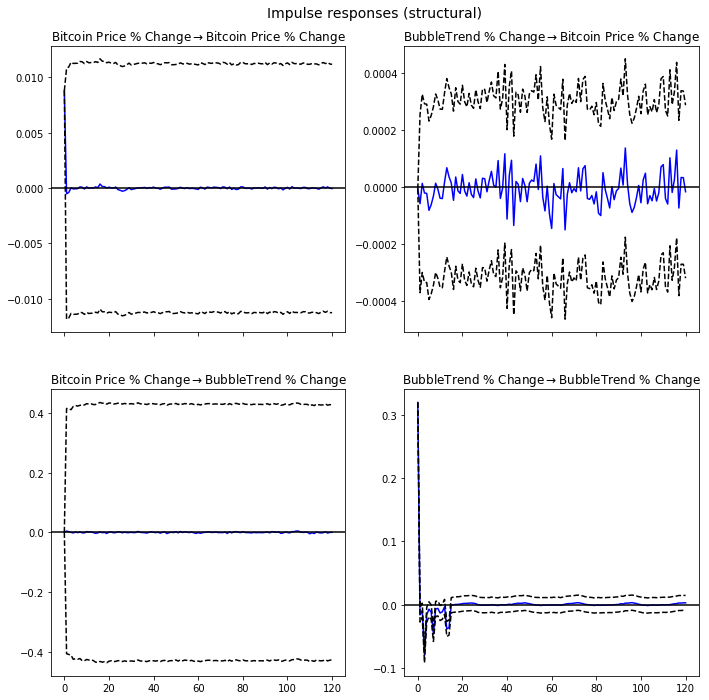

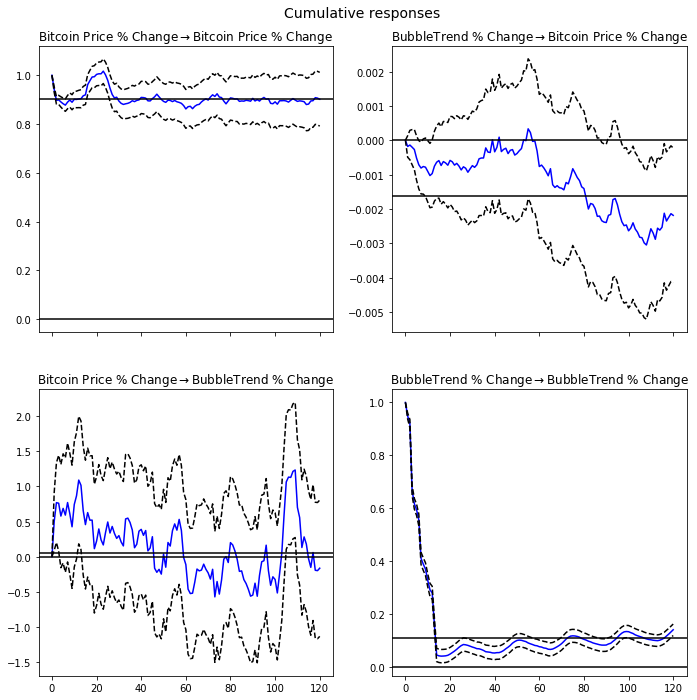

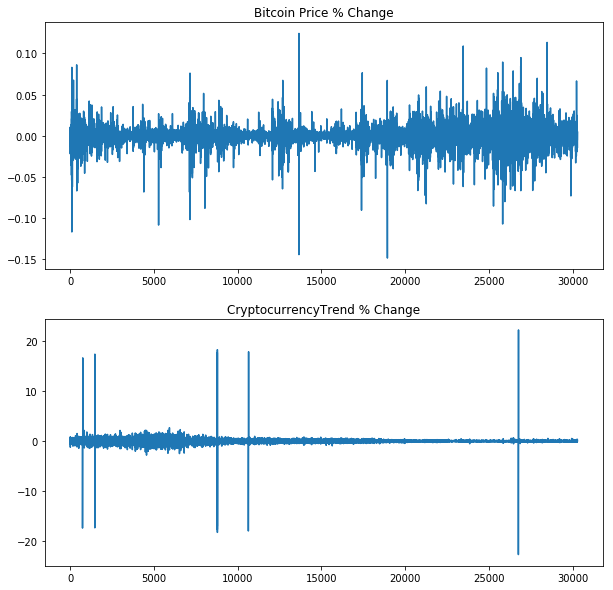

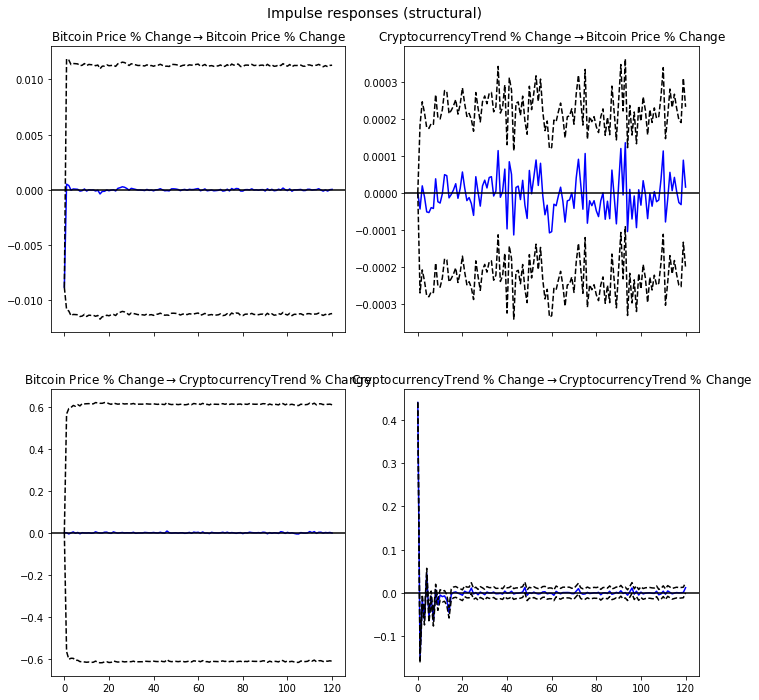

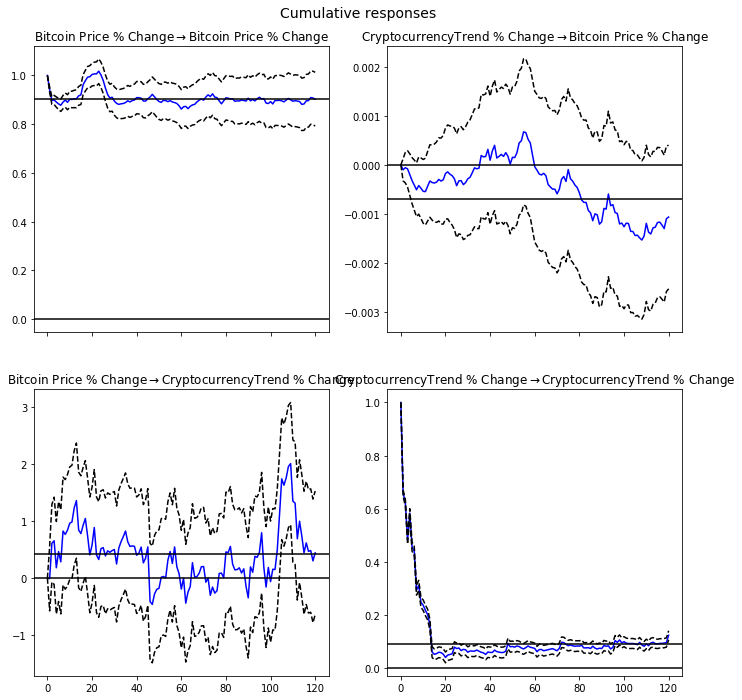

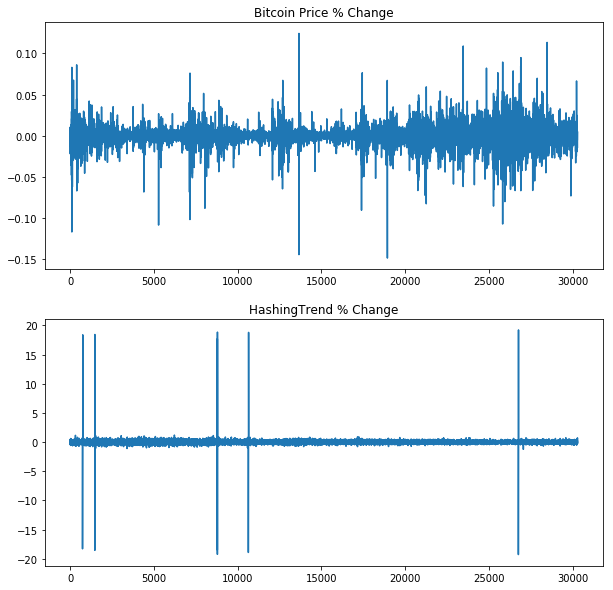

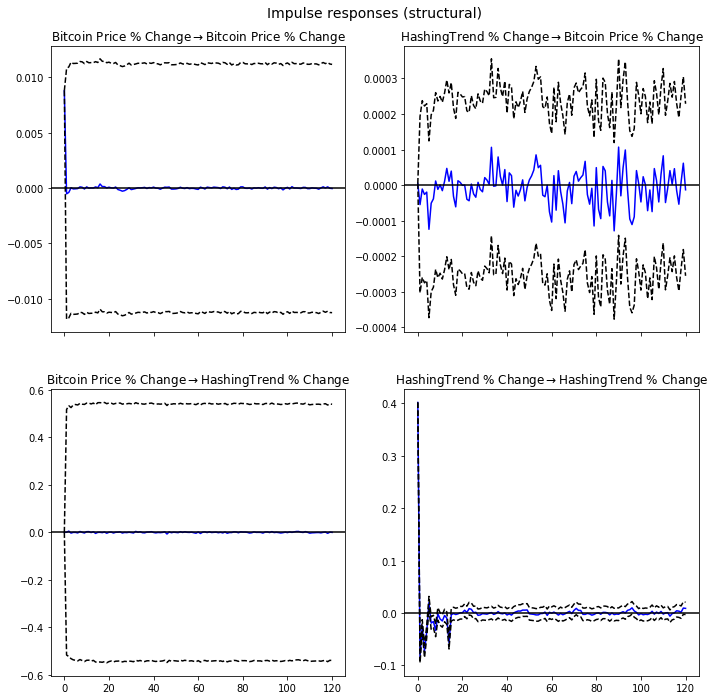

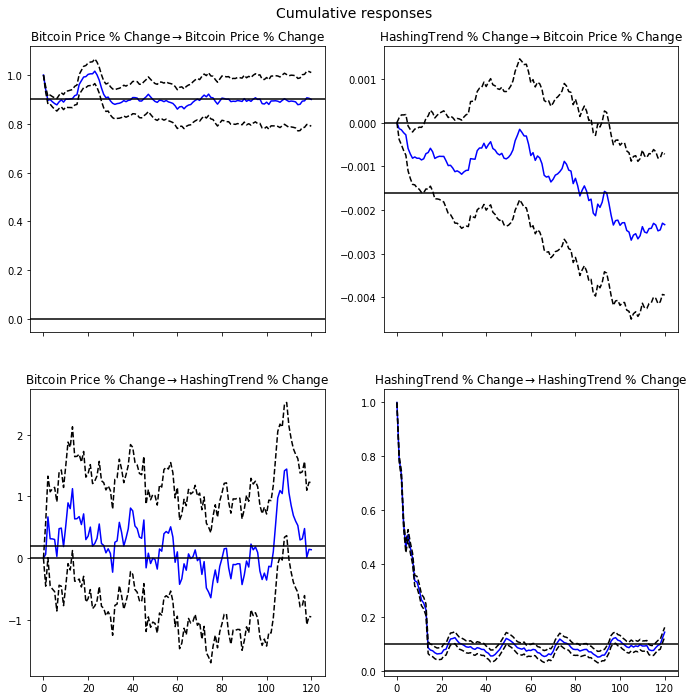

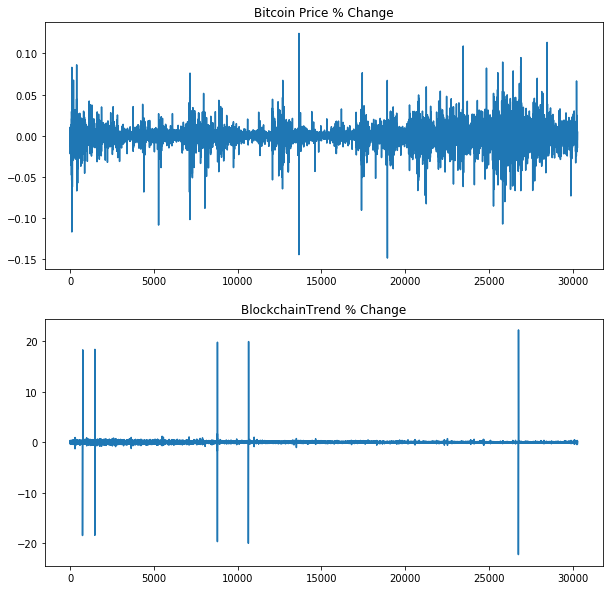

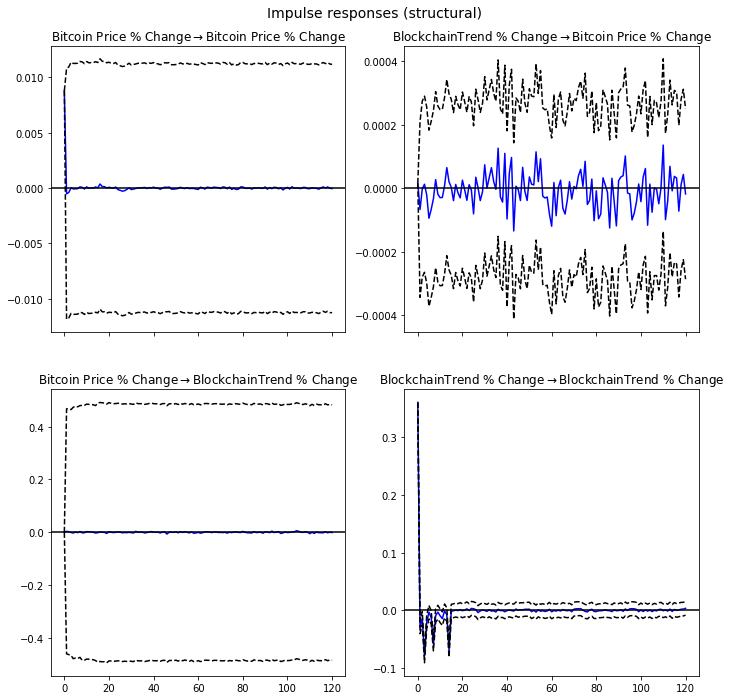

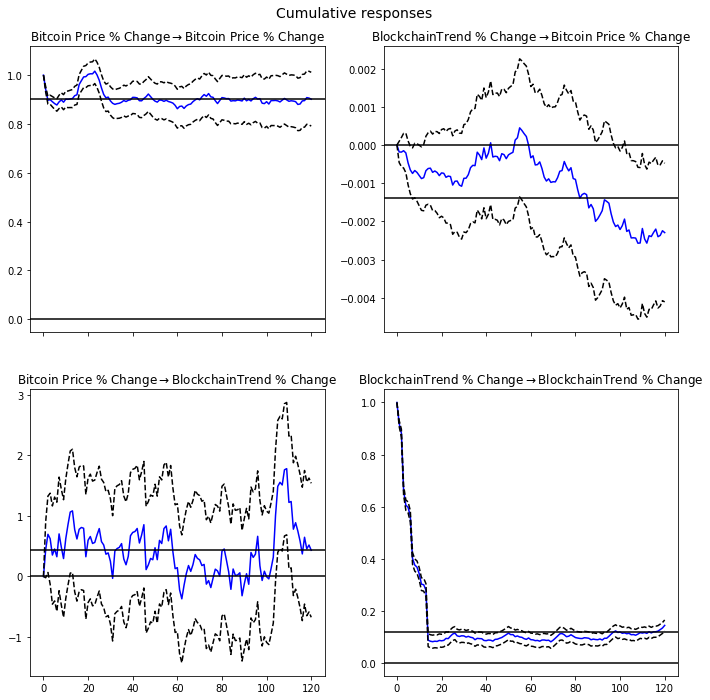

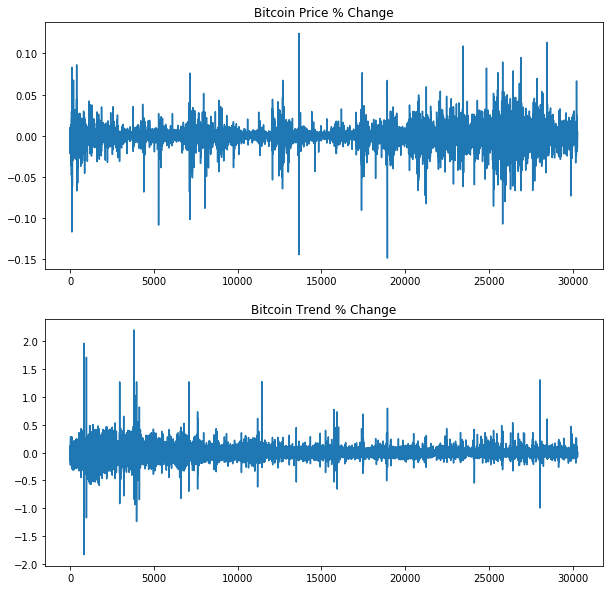

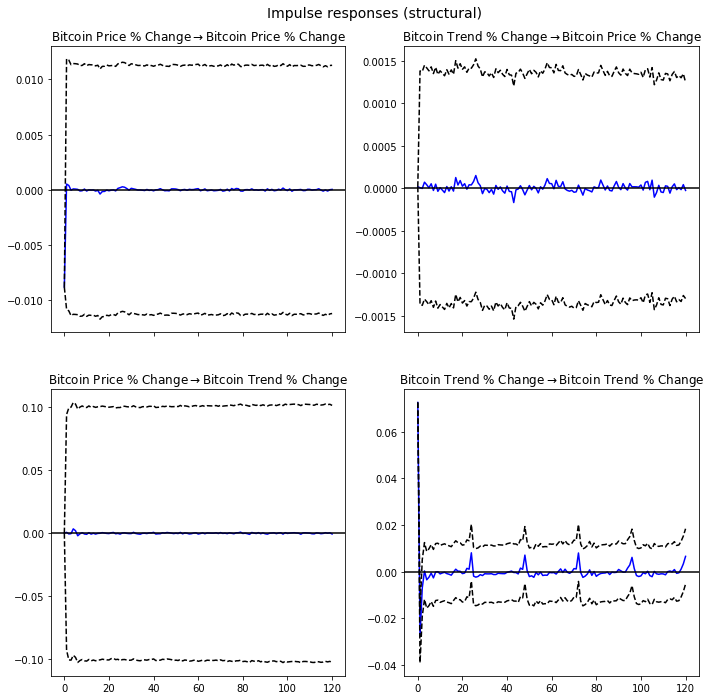

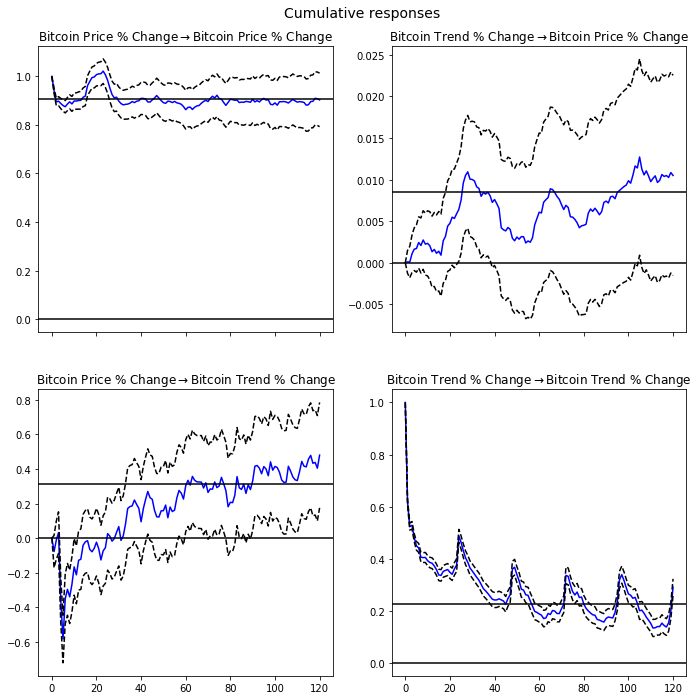

In [20]:
for feature in pct_change_features:
    svar_analysis(master_df, "Bitcoin Price % Change", feature , A, B, maxlag_num=120)

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.5868
Nobs:                     30160.0    HQIC:                  -10.6766
Log likelihood:           76533.6    FPE:                2.21186e-05
AIC:                     -10.7191    Det(Omega_mle):     2.17707e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                -0.058520         0.005780          -10.124           0.000
L1.BitstampTrend % Change (Abs)           0.000065         0.000

BitstampTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: BitstampTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.6465         1.222       0.999  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BitstampTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BitstampTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.5129         1.222       1.000  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.2973
Nobs:                     30160.0    HQIC:                  -11.3871
Log likelihood:           87247.8    FPE:                1.08691e-05
AIC:                     -11.4296    Det(Omega_mle):     1.06981e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                -0.059016         0.005780          -10.210           0.000
L1.CoinbaseTrend % Change (Abs)           0.000174         0.000

CoinbaseTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: CoinbaseTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.418          1.222       0.002  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> CoinbaseTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause CoinbaseTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8266         1.222       0.917  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.9954
Nobs:                     30160.0    HQIC:                  -11.0853
Log likelihood:           82696.1    FPE:                1.46988e-05
AIC:                     -11.1277    Det(Omega_mle):     1.44676e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                -0.058516         0.005780          -10.124           0.000
L1.EthereumTrend % Change (Abs)           0.000012         0.000

EthereumTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: EthereumTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.005          1.222       0.466  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> EthereumTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause EthereumTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.6682         1.222       0.998  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.5776
Nobs:                     30160.0    HQIC:                  -11.6675
Log likelihood:           91475.0    FPE:                8.21207e-06
AIC:                     -11.7099    Det(Omega_mle):     8.08292e-06
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change              -0.058616         0.005780          -10.142           0.000
L1.BubbleTrend % Change (Abs)           0.000131         0.000157     

BubbleTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: BubbleTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.277          1.222       0.022  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BubbleTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BubbleTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8195         1.222       0.926  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.1194
Nobs:                     30160.0    HQIC:                  -11.2092
Log likelihood:           84565.0    FPE:                1.29855e-05
AIC:                     -11.2517    Det(Omega_mle):     1.27812e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                             coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                      -0.058887         0.005780          -10.189           0.000
L1.CryptocurrencyTrend % Change (Abs)         

CryptocurrencyTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: CryptocurrencyTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.297          1.222       0.016  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> CryptocurrencyTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause CryptocurrencyTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8869         1.222       0.807  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.2824
Nobs:                     30160.0    HQIC:                  -11.3723
Log likelihood:           87024.2    FPE:                1.10315e-05
AIC:                     -11.4148    Det(Omega_mle):     1.08580e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change               -0.059211         0.005780          -10.244           0.000
L1.HashingTrend % Change (Abs)           0.000090         0.000136 

HashingTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: HashingTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.341          1.222       0.008  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> HashingTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause HashingTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.7711         1.222       0.970  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.4061
Nobs:                     30160.0    HQIC:                  -11.4960
Log likelihood:           88889.8    FPE:                9.74780e-06
AIC:                     -11.5385    Det(Omega_mle):     9.59449e-06
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                  -0.058735         0.005780          -10.162           0.000
L1.BlockchainTrend % Change (Abs)           0.000107      

BlockchainTrend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: BlockchainTrend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.293          1.222       0.017  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> BlockchainTrend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause BlockchainTrend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.8675         1.222       0.849  (120, 59840)
--------------------------------------------------


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:07:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.9761
Nobs:                     30160.0    HQIC:                  -15.0659
Log likelihood:           142724.    FPE:                2.74482e-07
AIC:                     -15.1084    Det(Omega_mle):     2.70165e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change                -0.059291         0.005780          -10.257           0.000
L1.Bitcoin Trend % Change (Abs)           0.000272         0.000

Bitcoin Trend % Change (Abs) -> Bitcoin Price % Change
Granger causality F-test. H_0: Bitcoin Trend % Change (Abs) does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    0.9868         1.222       0.524  (120, 59840)
--------------------------------------------------
Bitcoin Price % Change -> Bitcoin Trend % Change (Abs)
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause Bitcoin Trend % Change (Abs). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df     
--------------------------------------------------
    1.191          1.222       0.076  (120, 59840)
--------------------------------------------------


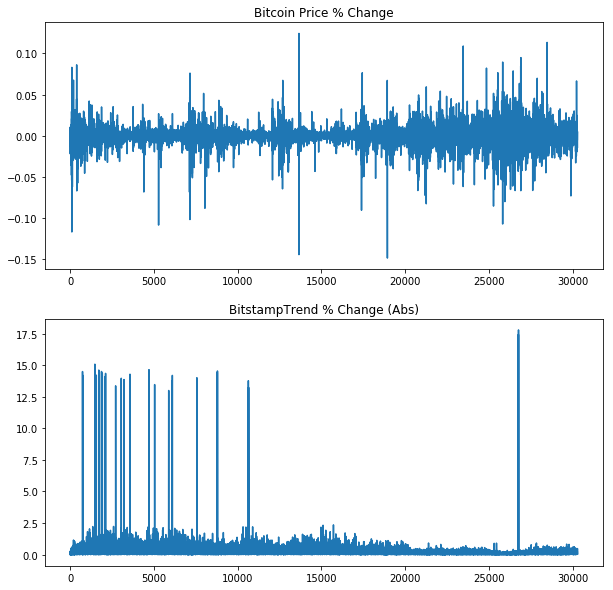

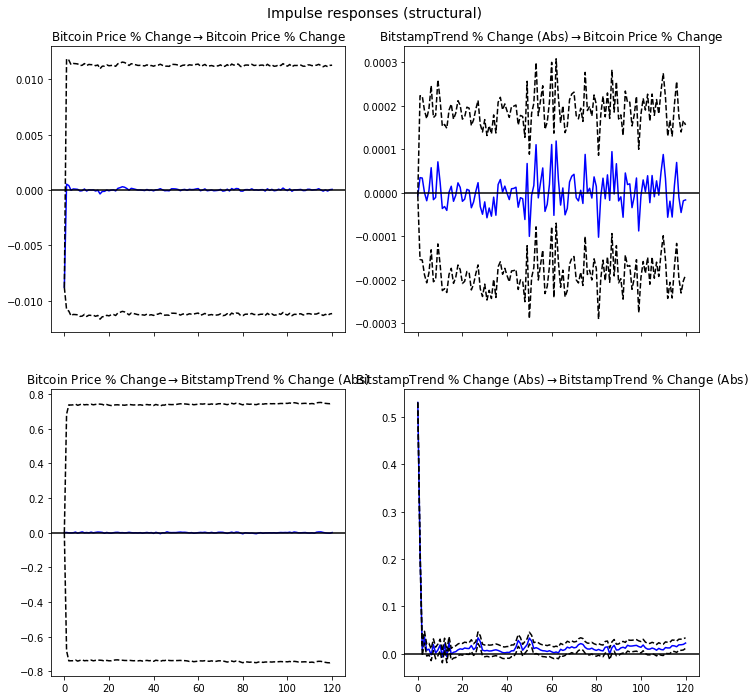

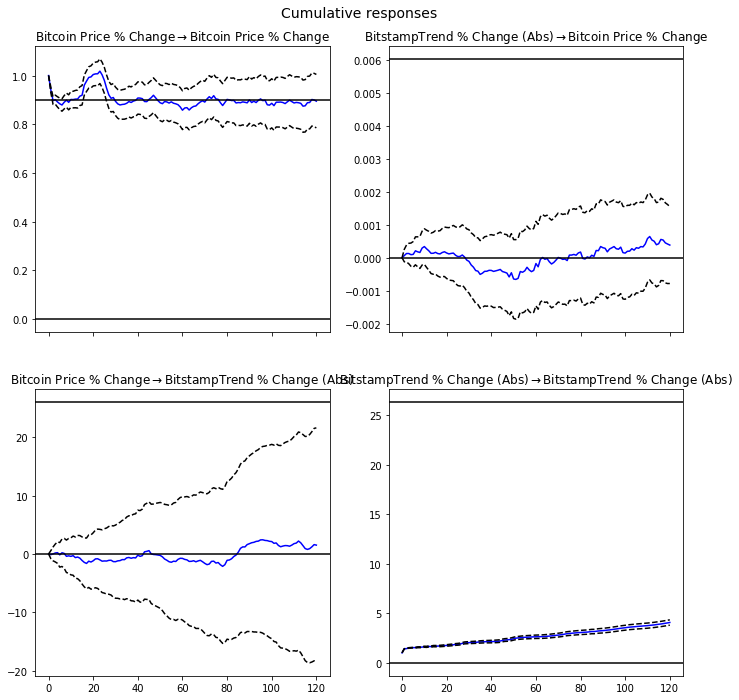

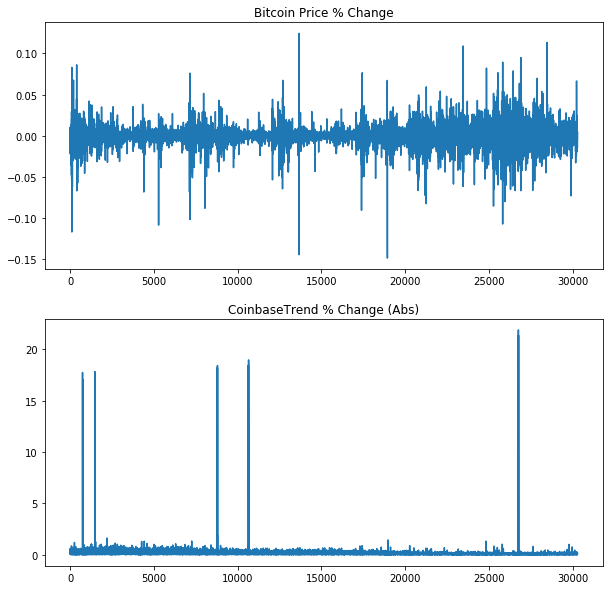

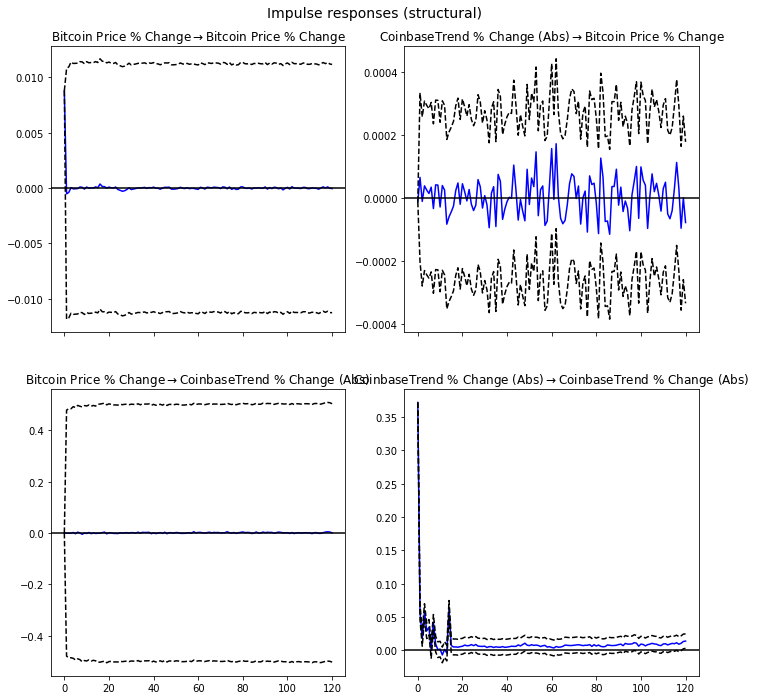

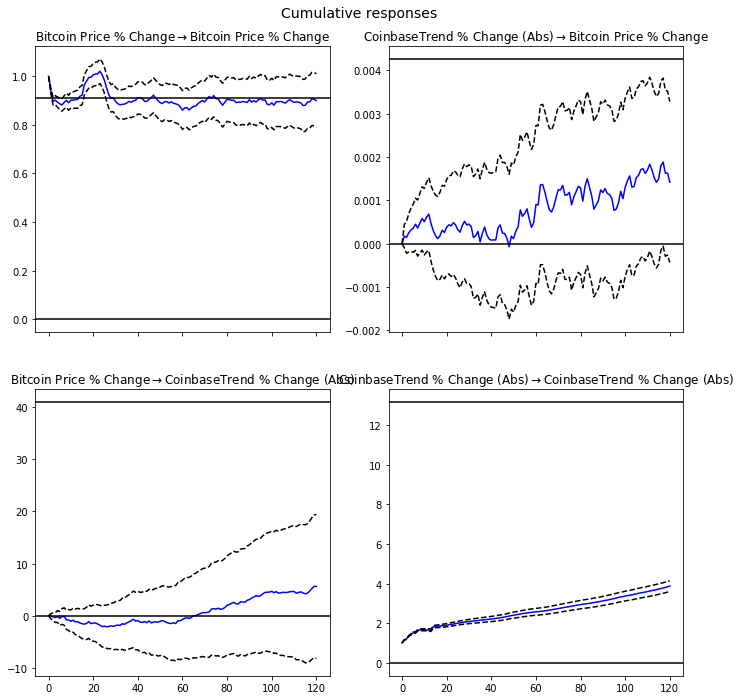

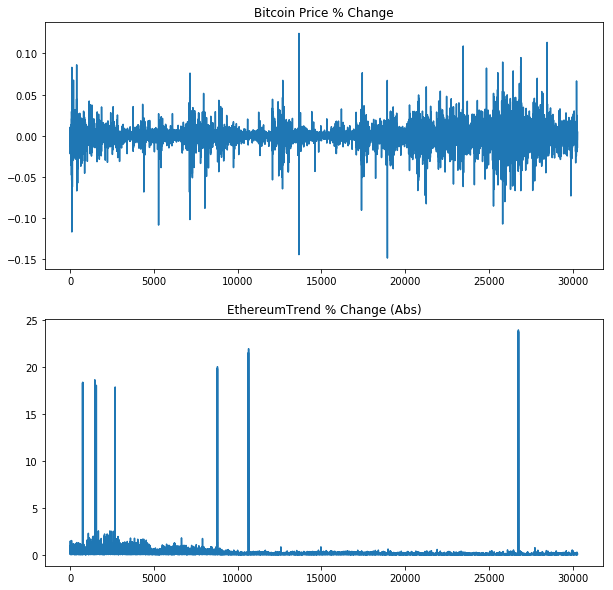

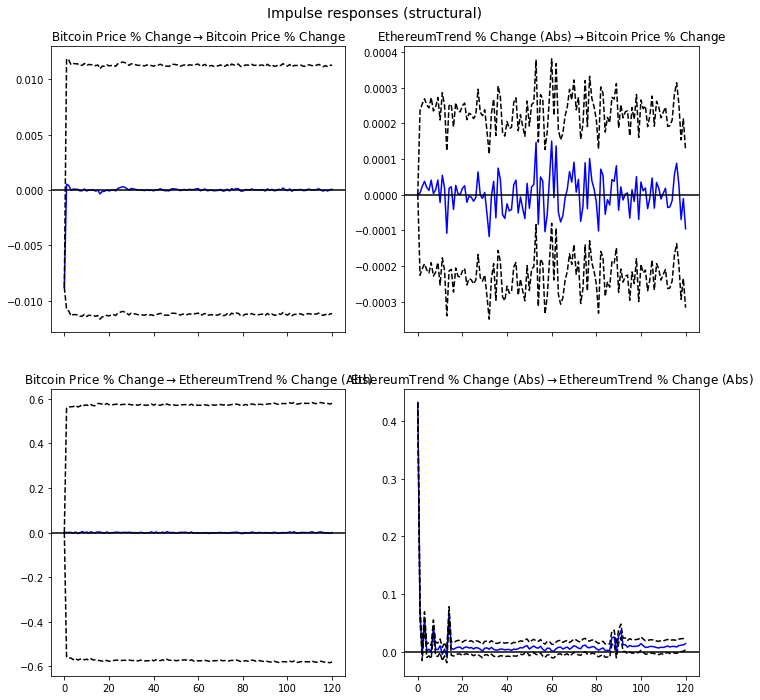

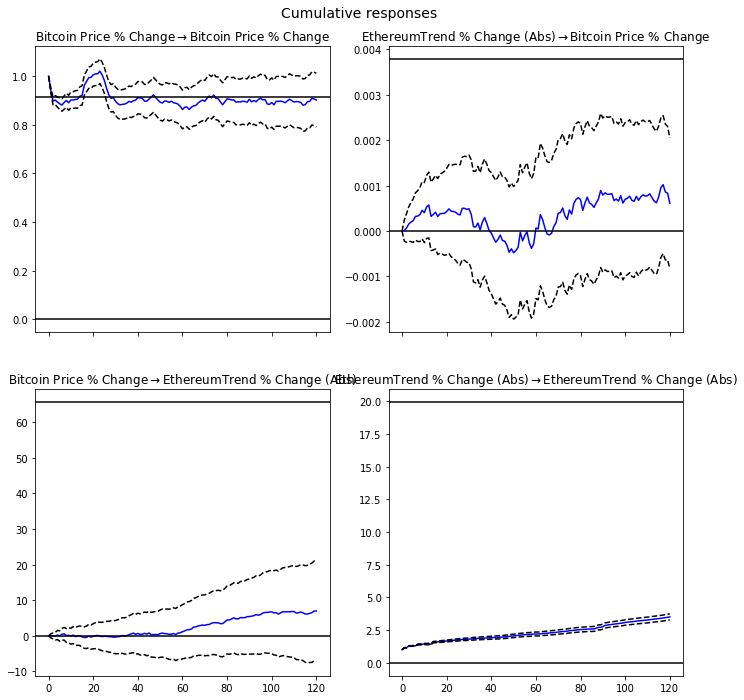

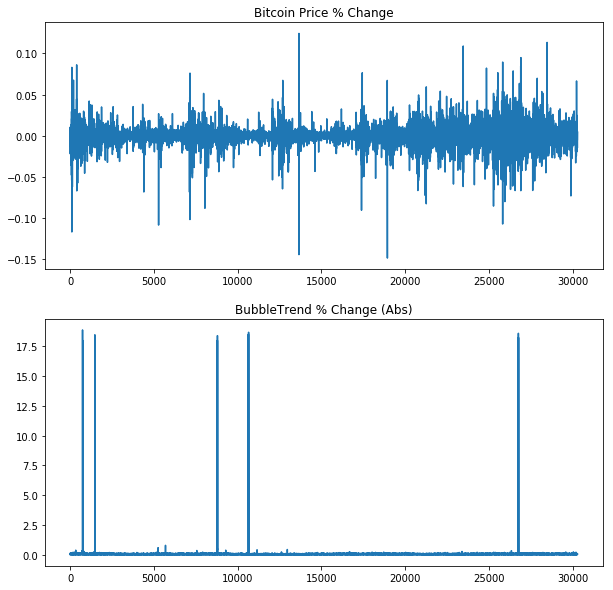

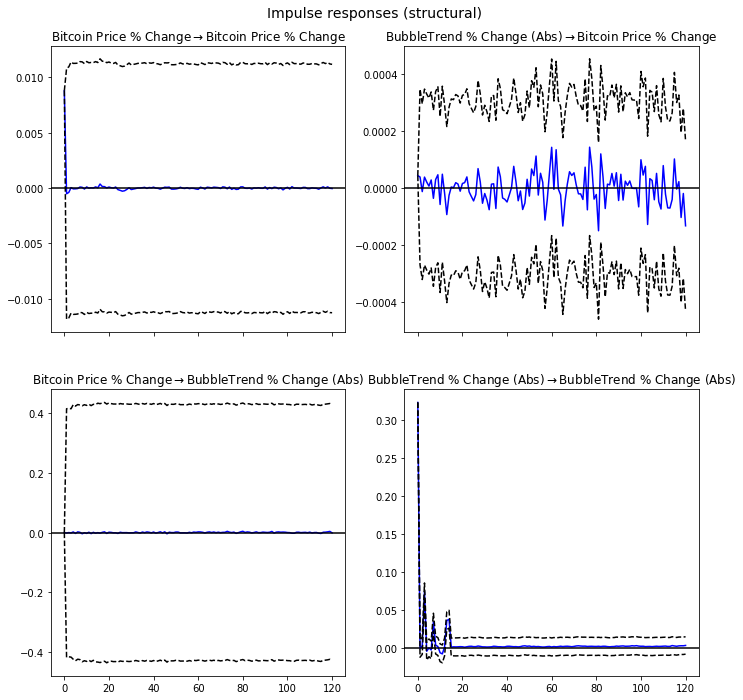

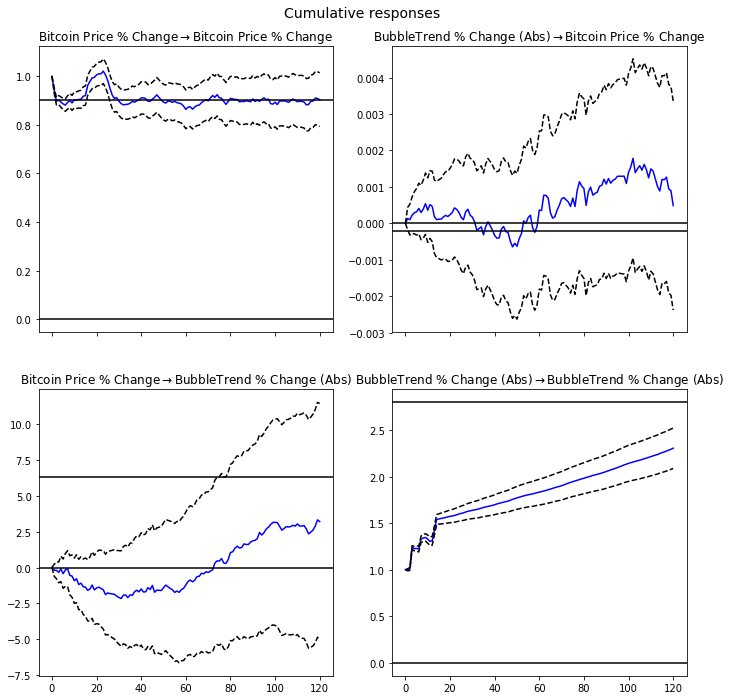

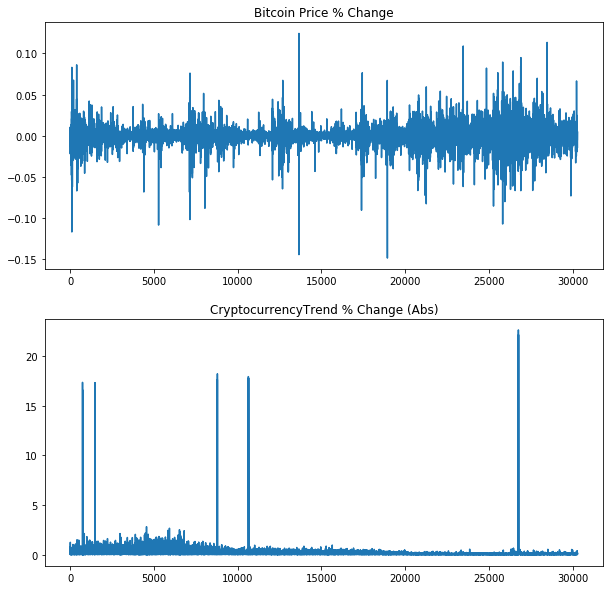

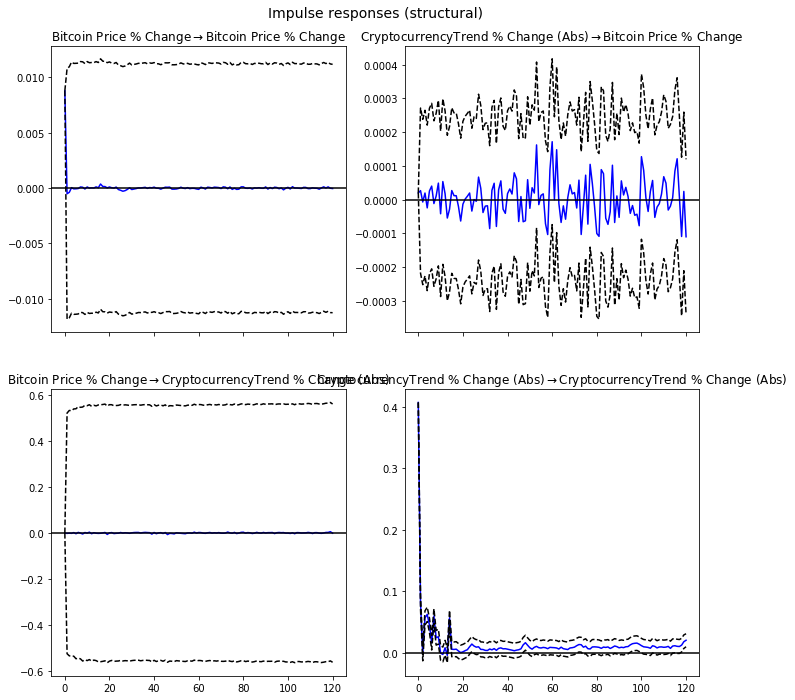

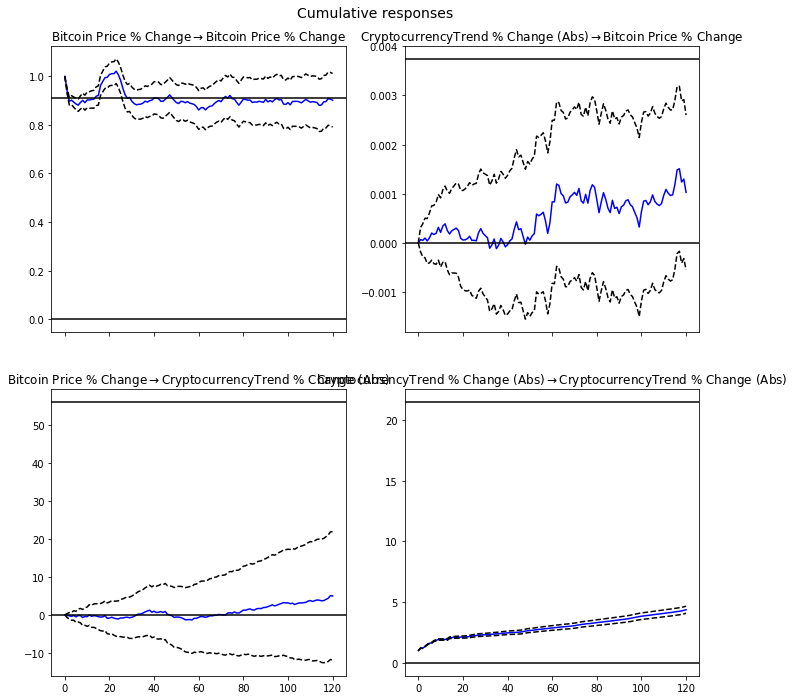

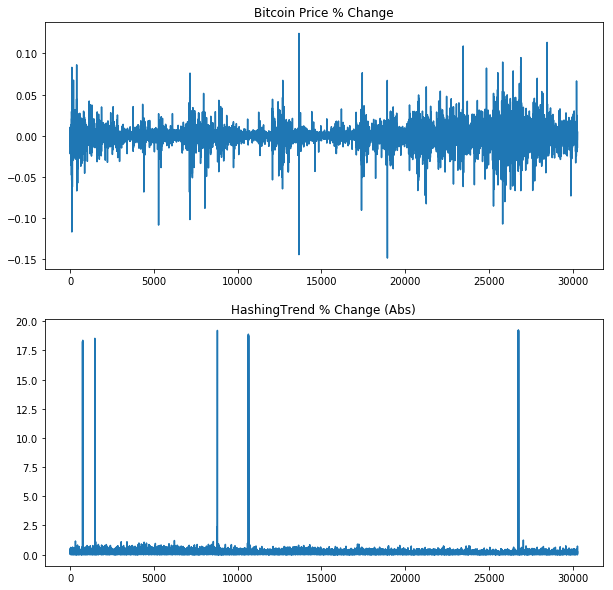

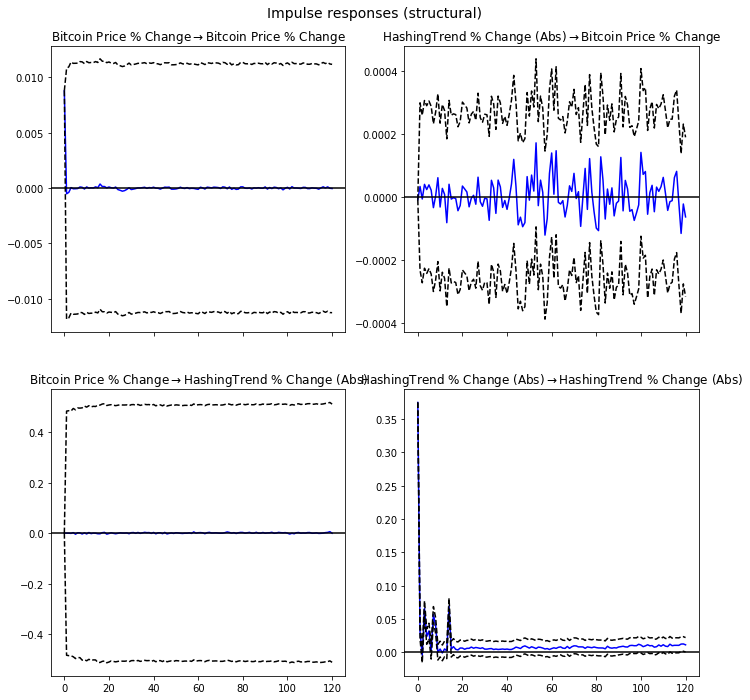

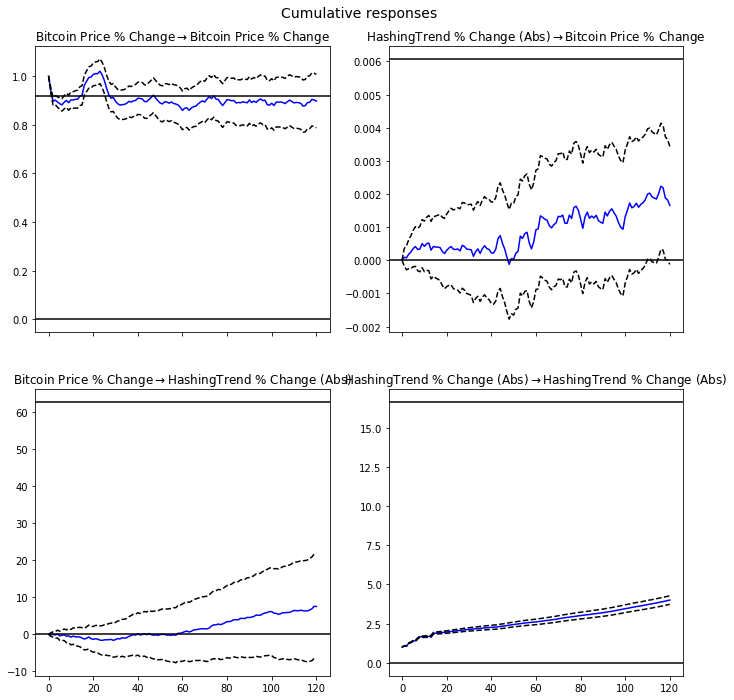

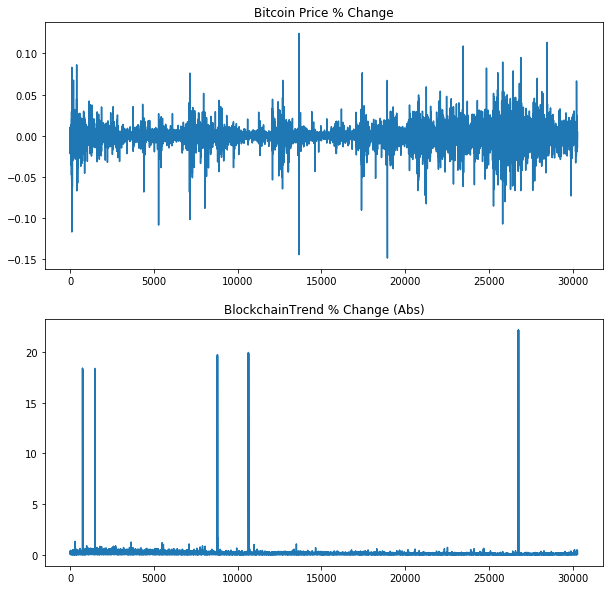

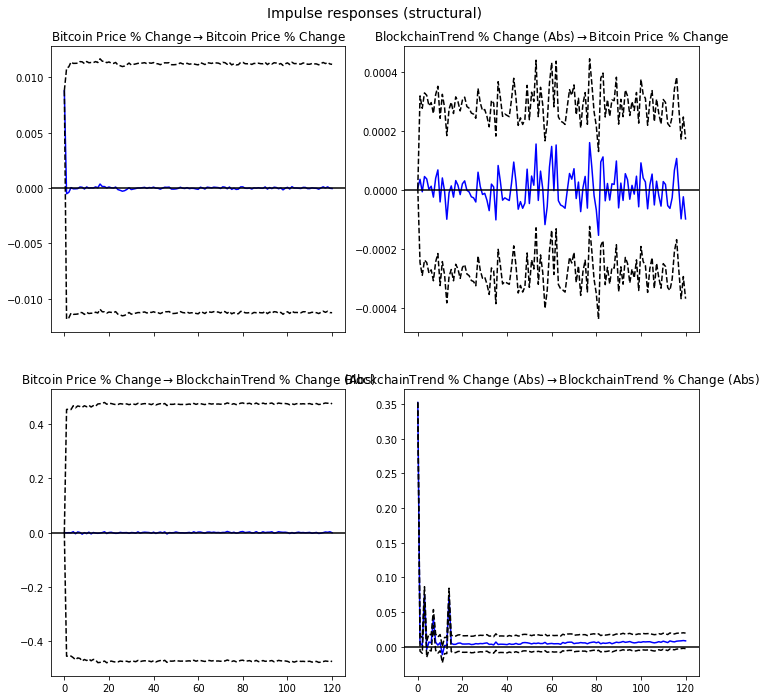

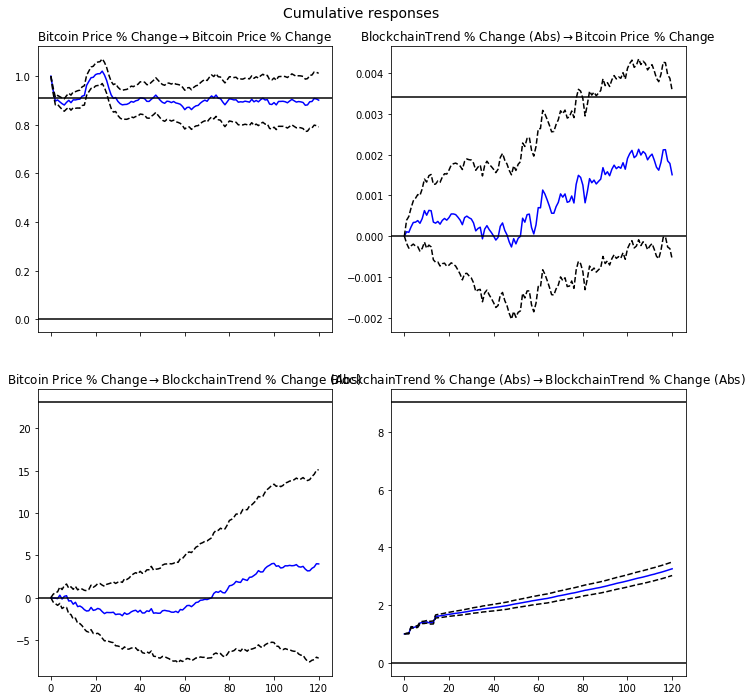

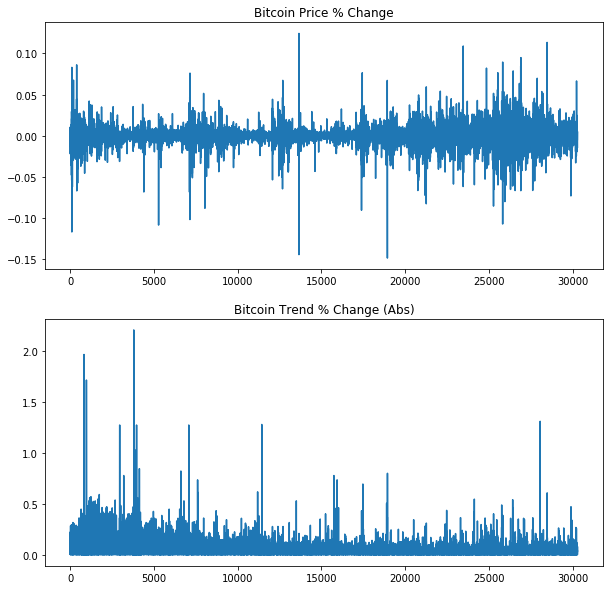

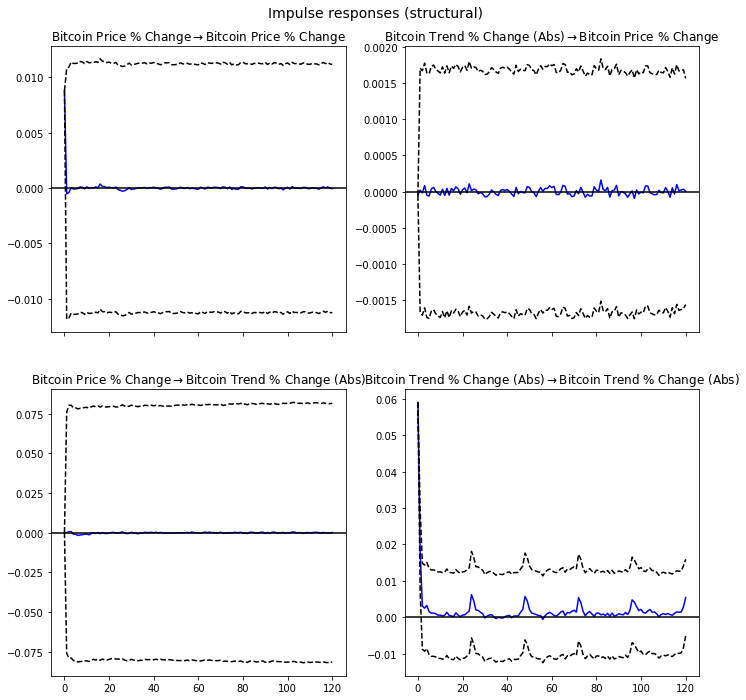

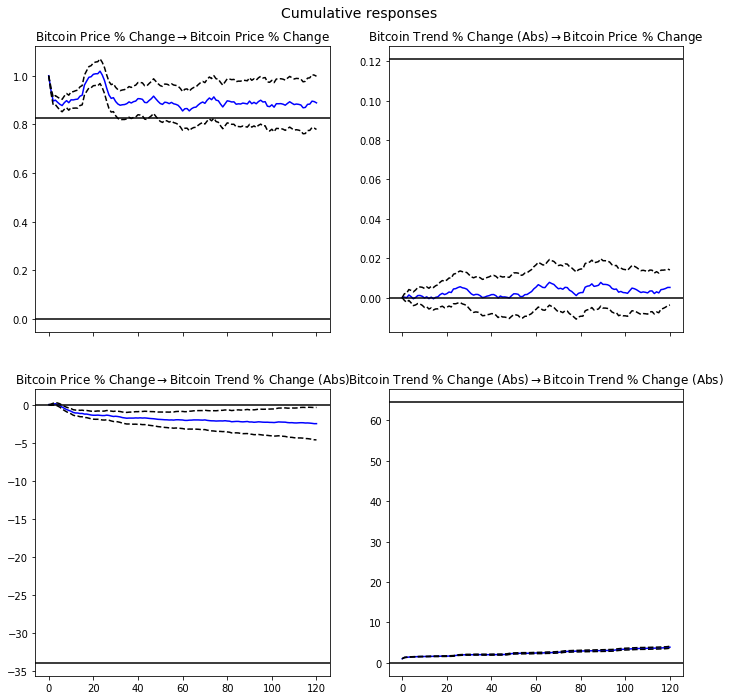

In [21]:
for feature in abs_pct_change_features:
    svar_analysis(master_df, "Bitcoin Price % Change", feature , A, B, maxlag_num=120)

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:09:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.2086
Nobs:                     30265.0    HQIC:                  -15.2198
Log likelihood:           144565.    FPE:                2.44249e-07
AIC:                     -15.2251    Det(Omega_mle):     2.43766e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change (Abs)
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change (Abs)          0.135906         0.005742           23.668           0.000
L1.Bitcoin Trend % Change               -0.000023         0.0

Granger Causality: Google Trend -> Close
Granger causality F-test. H_0: Bitcoin Trend % Change does not Granger-cause Bitcoin Price % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    2.265          1.667       0.003  (15, 60470)
-------------------------------------------------
Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin Price % Change (Abs) does not Granger-cause Bitcoin Trend % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    44.20          1.667       0.000  (15, 60470)
-------------------------------------------------


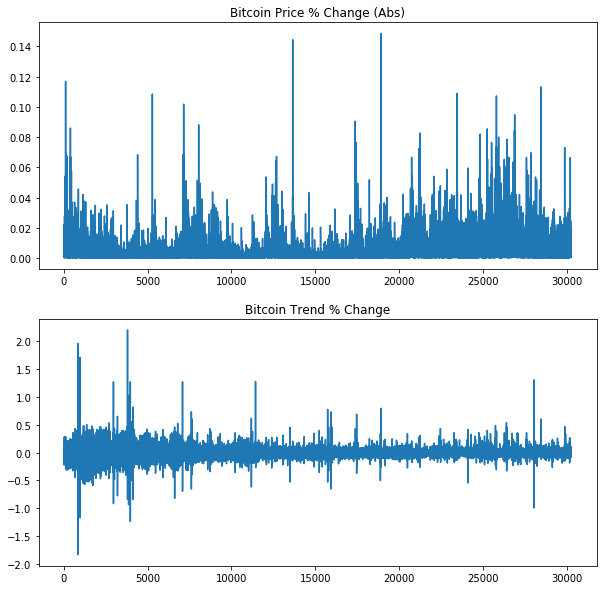

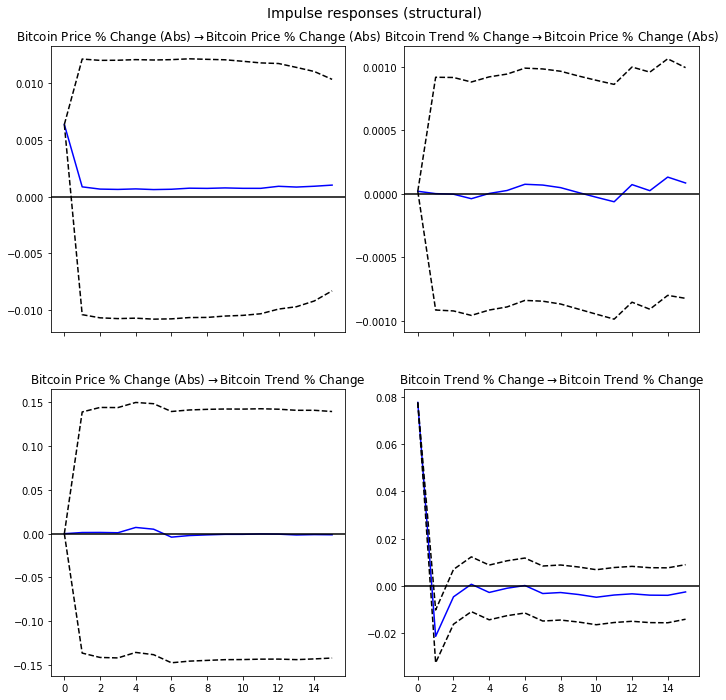

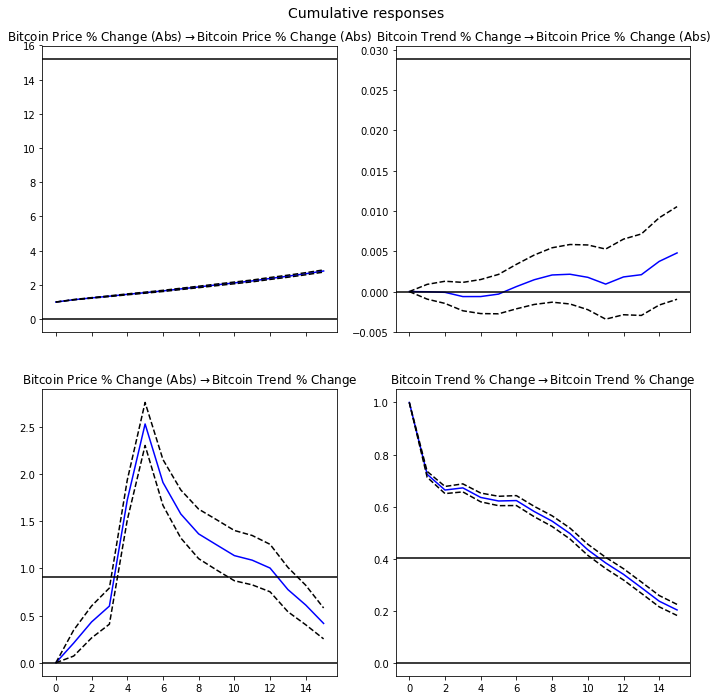

In [23]:
# Test Granger Causality 

SVAR_model = SVAR(master_df[["Bitcoin Price % Change (Abs)","Bitcoin Trend % Change"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags=15)
display(result_SVAR.summary())


SVAR_granger_result = result_SVAR.test_causality(caused="Bitcoin Price % Change (Abs)", causing="Bitcoin Trend % Change", kind='f')
print('Granger Causality: Google Trend -> Close')
print(SVAR_granger_result.summary())

# Test if Prices Granger Causes Trend 
SVAR_granger_result_2 = result_SVAR.test_causality(caused="Bitcoin Trend % Change", causing="Bitcoin Price % Change (Abs)", kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result_2.summary())


result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();



C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Thu, 30, Aug, 2018
Time:                     18:08:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.5981
Nobs:                     30275.0    HQIC:                  -15.6018
Log likelihood:           150302.    FPE:                1.67284e-07
AIC:                     -15.6036    Det(Omega_mle):     1.67173e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change (Abs)
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change (Abs)         0.204413         0.005693           35.907           0.000
L1.Bitcoin Trend % Change (Abs)         0.001563         0.00060

Granger Causality: Google Trend -> Close
Granger causality F-test. H_0: Bitcoin Trend % Change (Abs) does not Granger-cause Bitcoin Price % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    72.24          2.214       0.000  (5, 60530)
------------------------------------------------
Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin Price % Change (Abs) does not Granger-cause Bitcoin Trend % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    175.0          2.214       0.000  (5, 60530)
------------------------------------------------


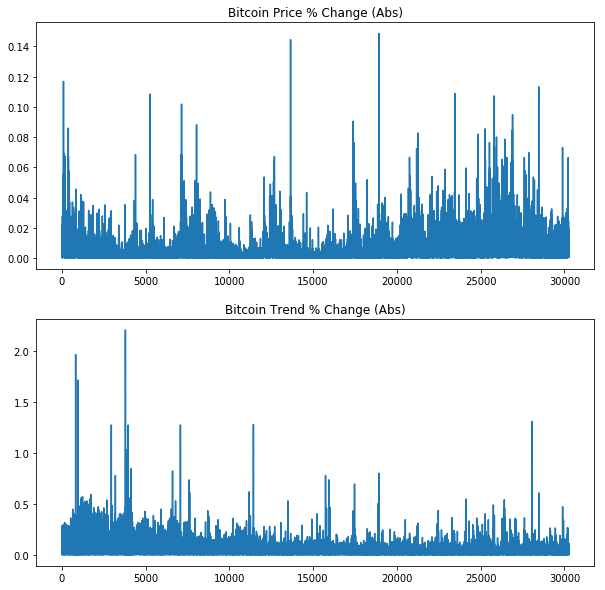

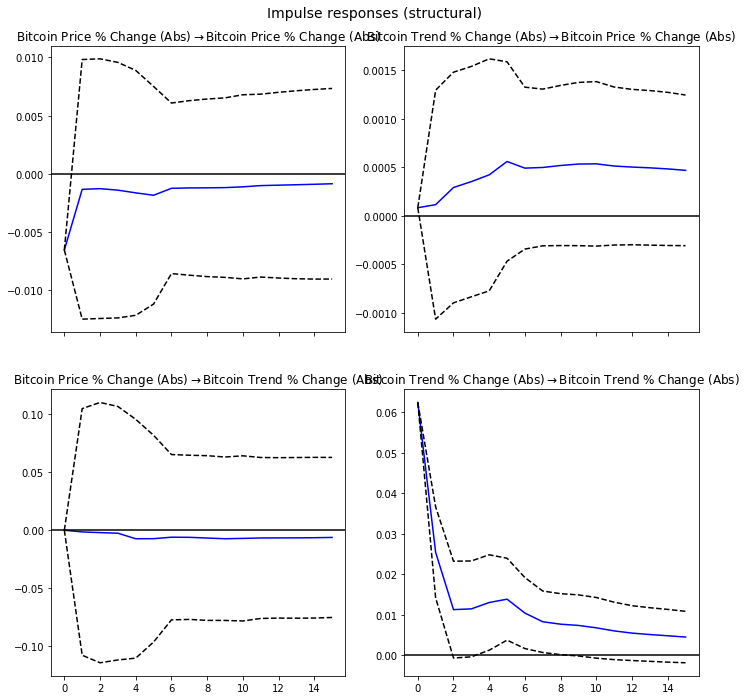

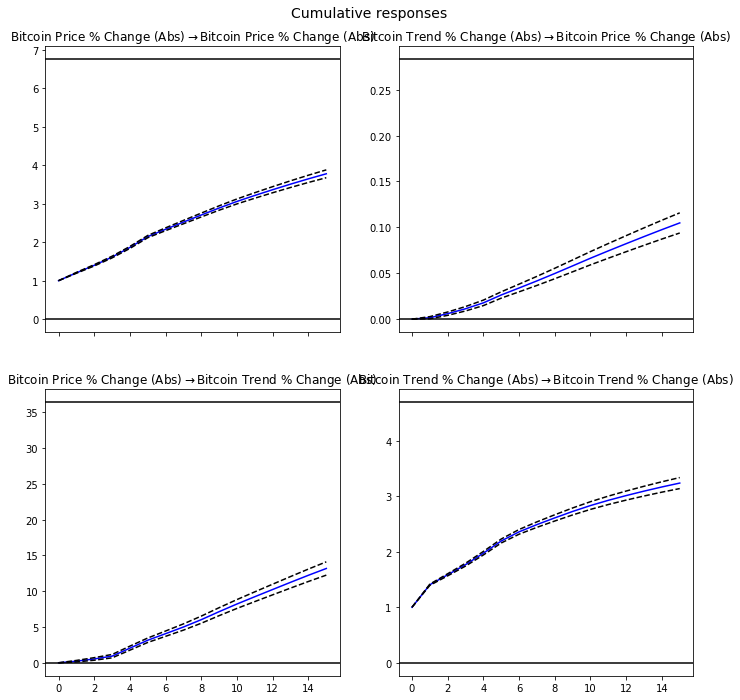

In [22]:
# Test Granger Causality 

SVAR_model = SVAR(master_df[["Bitcoin Price % Change (Abs)","Bitcoin Trend % Change (Abs)"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags=5)
display(result_SVAR.summary())


SVAR_granger_result = result_SVAR.test_causality(caused="Bitcoin Price % Change (Abs)", causing="Bitcoin Trend % Change (Abs)", kind='f')
print('Granger Causality: Google Trend -> Close')
print(SVAR_granger_result.summary())

# Test if Prices Granger Causes Trend 
SVAR_granger_result_2 = result_SVAR.test_causality(caused="Bitcoin Trend % Change (Abs)", causing="Bitcoin Price % Change (Abs)", kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result_2.summary())


result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();

